In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('assignment_data.csv')
print(df.head())

   Employee_ID      Name  Age            Department  Salary  Experience
0            1    Hamnet   14               Support   78624        2009
1            2    Hester   29  Business Development   82425        1997
2            3       Mab   42           Engineering   17220        1995
3            4   Thedric   55       Human Resources   15749        1995
4            5  Meredith   16       Human Resources   38795        2005


In [8]:
#display basic information

print("1. Basic Dataset Information")
print("-" * 80)
print(f"Number of records: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 records:")
print(df.head())
print("-" * 80)
# Data types of each column
print("\nData types:")
print(df.dtypes)
print("-" * 80)
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
print("-" * 80)
# Basic statistics of numeric columns
print("\nBasic statistics of numeric columns:")
print(df.describe())

1. Basic Dataset Information
--------------------------------------------------------------------------------
Number of records: 100
Number of columns: 6

Column names:
['Employee_ID', 'Name', 'Age', 'Department', 'Salary', 'Experience']

First 5 records:
   Employee_ID      Name  Age            Department  Salary  Experience
0            1    Hamnet   14               Support   78624        2009
1            2    Hester   29  Business Development   82425        1997
2            3       Mab   42           Engineering   17220        1995
3            4   Thedric   55       Human Resources   15749        1995
4            5  Meredith   16       Human Resources   38795        2005
--------------------------------------------------------------------------------

Data types:
Employee_ID     int64
Name           object
Age             int64
Department     object
Salary          int64
Experience      int64
dtype: object
------------------------------------------------------------------------

In [11]:
# 2. Find average salary in each department
print("\n2. Average Salary by Department")
print("-" * 80)
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().reset_index()
avg_salary_by_dept = avg_salary_by_dept.sort_values('Salary', ascending=False)
print(avg_salary_by_dept)


2. Average Salary by Department
--------------------------------------------------------------------------------
                  Department        Salary
4                      Legal  65948.500000
0                 Accounting  65646.600000
1       Business Development  64842.666667
11                  Training  63295.142857
5                  Marketing  56854.000000
3            Human Resources  56532.800000
7   Research and Development  56406.500000
10                   Support  55797.000000
2                Engineering  53511.900000
6         Product Management  49734.333333
8                      Sales  48847.833333
9                   Services  40267.625000


In [15]:
#3. Find the highest and lowest salary in the company
max_salary = df['Salary'].max()
min_salary = df['Salary'].min()

print("Highest and Lowest Salary")
print("-" * 80)
print(f"Highest salary: {max_salary}")
print(f"Lowest salary: {min_salary}")

Highest and Lowest Salary
--------------------------------------------------------------------------------
Highest salary: 98534
Lowest salary: 15749


In [19]:
# 4. Find the employee with the max salary
max_salary_emp = df[df['Salary'] == max_salary]
print("\nEmployee with Maximum Salary")
print("-" * 80)
print(max_salary_emp[['Employee_ID', 'Name', 'Department', 'Salary', 'Experience']])


Employee with Maximum Salary
--------------------------------------------------------------------------------
    Employee_ID   Name Department  Salary  Experience
53           54  Ranna  Marketing   98534        2001


In [21]:
# 5. Count the number of employees in each department
dept_counts = df['Department'].value_counts().reset_index()
dept_counts.columns = ['Department', 'Number of Employees']

print("\n Number of Employees by Department")
print("-" * 80)
print(dept_counts)


 Number of Employees by Department
--------------------------------------------------------------------------------
                  Department  Number of Employees
0            Human Resources                   15
1                  Marketing                   11
2                 Accounting                   10
3                Engineering                   10
4       Business Development                    9
5                    Support                    8
6                   Services                    8
7   Research and Development                    8
8                   Training                    7
9         Product Management                    6
10                     Sales                    6
11                     Legal                    2


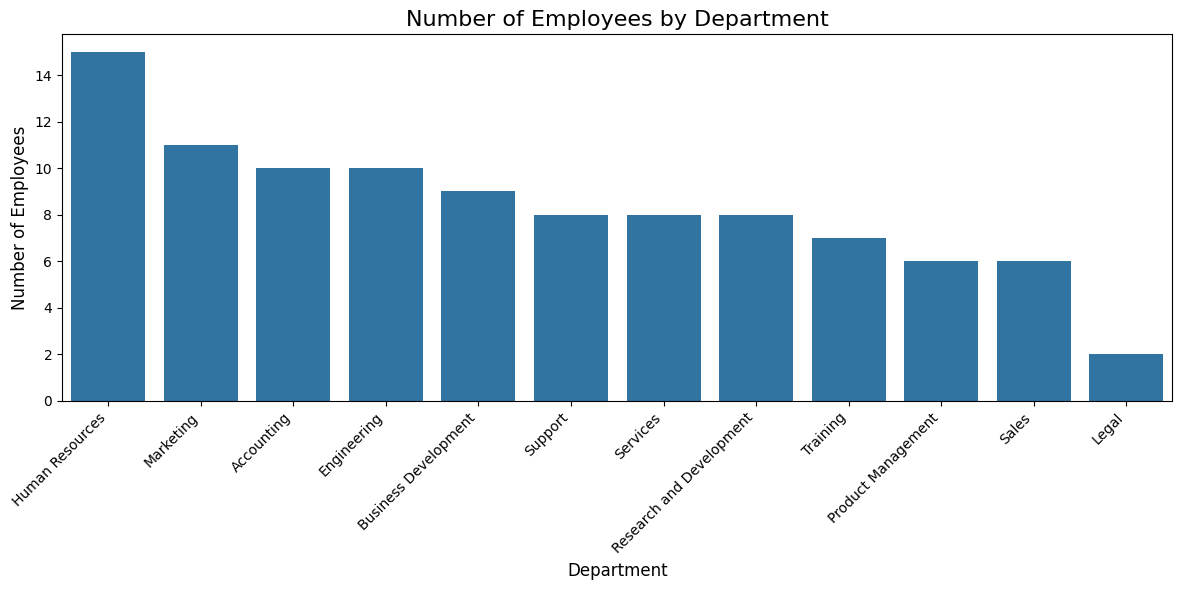

In [22]:
# 6.Plot a bar chart showing the number of employees in each department
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='Number of Employees', data=dept_counts)
plt.title('Number of Employees by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('employees_by_department.png')
plt.show()

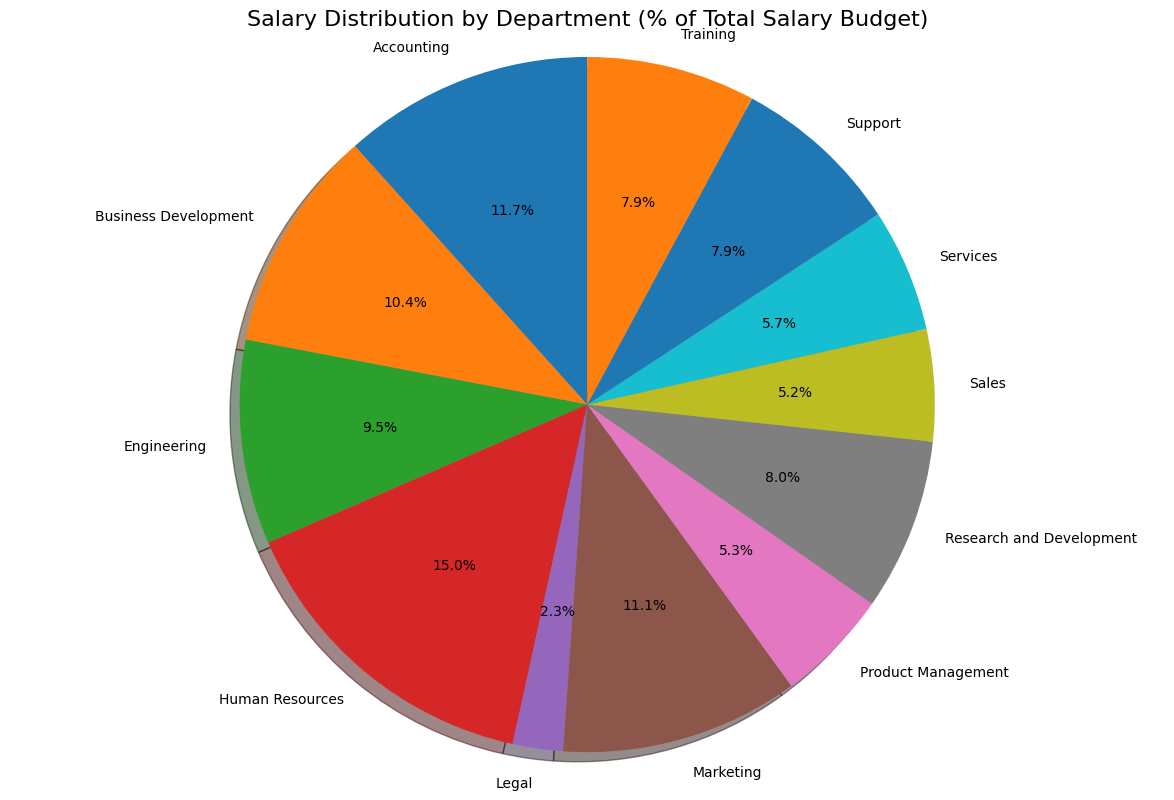

In [23]:
# 7. Plot a pie chart showing salary distribution by department

dept_salary = df.groupby('Department')['Salary'].sum()
plt.figure(figsize=(12, 8))
plt.pie(dept_salary, labels=dept_salary.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Salary Distribution by Department (% of Total Salary Budget)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('salary_distribution_pie_chart.png')
plt.show()


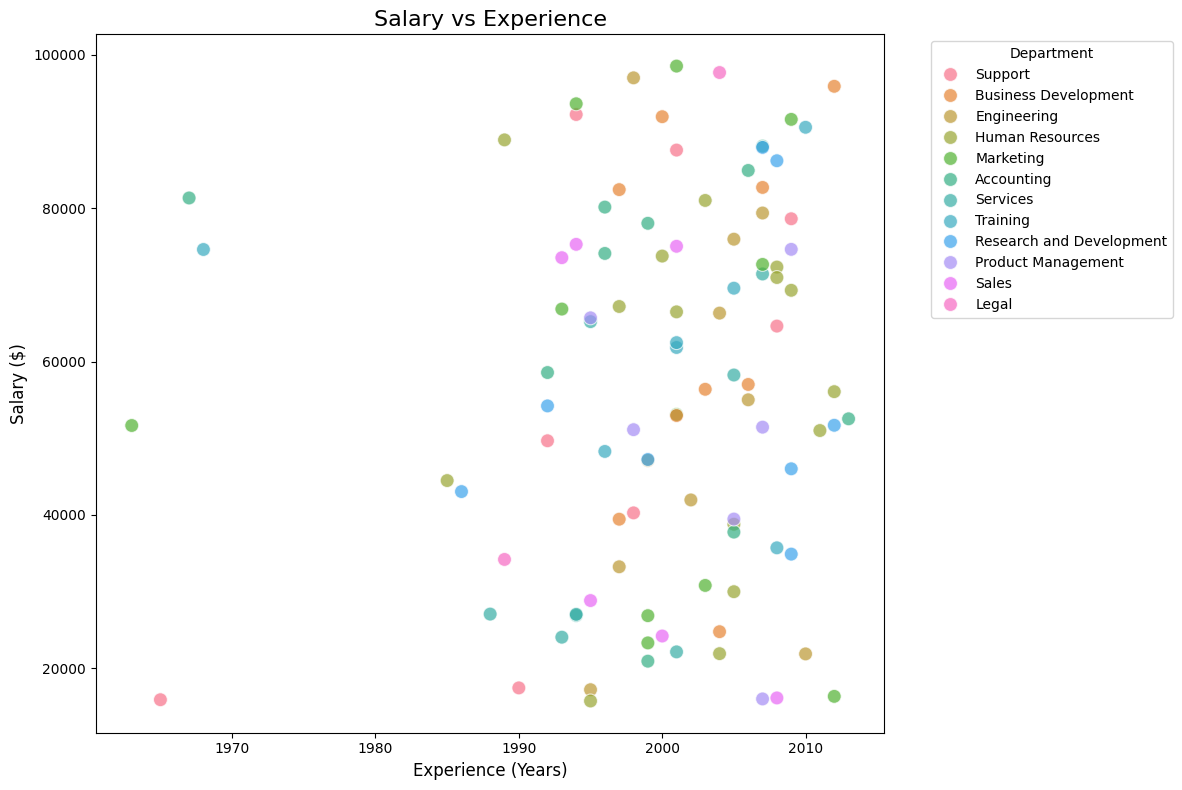

In [24]:
# 8. Scatter plot showing salary vs experience
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Experience', y='Salary', hue='Department', data=df, s=100, alpha=0.7)
plt.title('Salary vs Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('salary_vs_experience_scatter.png')
plt.show()

In [28]:
# 9.Find employees who earn more than average salary
avg_salary = df['Salary'].mean()
high_earners = df[df['Salary'] > avg_salary]

print("\n7. Employees Earning Above Average Salary")
print("-" * 80)
print(f"Average salary: ${avg_salary:.2f}")
print(f"Number of employees earning above average: {len(high_earners)}")
print("\n Employees earning above average")
print(high_earners[['Employee_ID', 'Name', 'Department', 'Salary']])


7. Employees Earning Above Average Salary
--------------------------------------------------------------------------------
Average salary: $56347.80
Number of employees earning above average: 50

 Employees earning above average
    Employee_ID       Name                Department  Salary
0             1     Hamnet                   Support   78624
1             2     Hester      Business Development   82425
6             7      Rahel                   Support   87582
10           11       Ryan                   Support   92219
12           13  Miof mela                  Services   71426
14           15   Hurleigh                Accounting   84925
15           16      Bondy           Human Resources   72329
18           19      Arlin                Accounting   81336
19           20    Silvano               Engineering   97001
20           21     Kaspar      Business Development   56391
21           22    Danette      Business Development   82711
22           23       Owen      Busine

In [33]:
# 10. Sort employees based on salary in descending order
sorted_emp = df.sort_values('Salary', ascending=False)

print("\n Employees Sorted by Salary (Highest to Lowest)")
print("-" * 80)
print("highest-paid employees:")
print(sorted_emp[['Employee_ID', 'Name', 'Department', 'Salary', 'Experience']])



 Employees Sorted by Salary (Highest to Lowest)
--------------------------------------------------------------------------------
highest-paid employees:
    Employee_ID      Name            Department  Salary  Experience
53           54     Ranna             Marketing   98534        2001
48           49     Sammy                 Legal   97693        2004
19           20   Silvano           Engineering   97001        1998
22           23      Owen  Business Development   95898        2012
97           98     Natal             Marketing   93617        1994
..          ...       ...                   ...     ...         ...
52           53   Yevette             Marketing   16352        2012
31           32  Marshall                 Sales   16145        2008
33           34      Rock    Product Management   16016        2007
37           38       Van               Support   15913        1965
3             4   Thedric       Human Resources   15749        1995

[100 rows x 5 columns]
